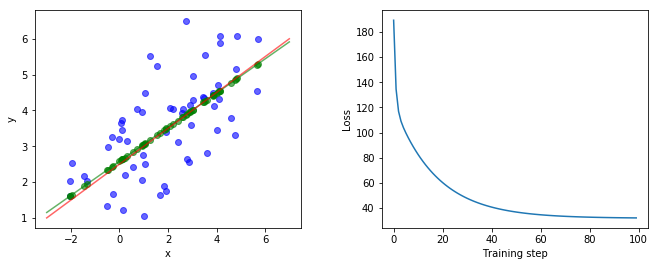

In [2]:
# created and trained a neural network and used it to predict values of a function given noisy point samples. 

'''Single neuron neural network'''
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
# Draw plots inline in the notebook
%matplotlib inline
# Set up sample points perturbed away from the ideal linear relationship 
# y = 0.5*x + 2.5
num_examples = 60
points = np.array([np.linspace(-1, 5, num_examples),
  np.linspace(2, 5, num_examples)])
points += np.random.randn(2, num_examples)
x, y = points
# Include a 1 to use as the bias input for neurons
x_with_bias = np.array([(1., d) for d in x]).astype(np.float32)
# Training parameters
training_steps = 100
learning_rate = 0.001
losses = []
with tf.Session():
  # Set up all the tensors, variables, and operations.
  input = tf.constant(x_with_bias)
  target = tf.constant(np.transpose([y]).astype(np.float32))
  # Initialize weights with small random values
  weights = tf.Variable(tf.random_normal([2, 1], 0, 0.1))
  tf.global_variables_initializer().run()
  # Calculate the current prediction error
  y_predicted = tf.matmul(input, weights)
  y_error = tf.subtract(y_predicted, target)
  # Compute the L2 loss function of the error
  loss = tf.nn.l2_loss(y_error)
  # Train the network using an optimizer that minimizes the loss function
  update_weights = tf.train.GradientDescentOptimizer(
    learning_rate).minimize(loss)
  for _ in range(training_steps):
    # Repeatedly run the operations, updating the TensorFlow variable.
    update_weights.run()
    losses.append(loss.eval())
  # Training is done, get the final values for the graphs
  w = weights.eval()
  y_predicted = y_predicted.eval()
# Show the fit and the loss over time.
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(wspace=.3)
fig.set_size_inches(11, 4)
# Plot the perturbed points in blue dots
ax1.scatter(x, y, c="b", alpha=.6)
# Plot the predicted values in green dots
ax1.scatter(x, np.transpose(y_predicted)[0], c="g", alpha=0.6)
line_x_range = (-3, 7)
# Plot the predicted line in green
ax1.plot(line_x_range, [w[1] * x + w[0]
                       for x in line_x_range], "g", alpha=0.6)
# Plot the noise-free line (0.5*x + 2.5) in red
ax1.plot(line_x_range, [0.5 * x + 2.5
                        for x in line_x_range], "r", alpha=0.6)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax2.plot(range(0, training_steps), losses)
ax2.set_xlabel("Training step")
ax2.set_ylabel("Loss")
plt.show()